<h1 style="text-align: center; color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 36px; text-shadow: 2px 2px #D1D1D1;">
    Processing the Data (PTD) for Workers' Compensation Claims
</h1>
<hr style="border: 2px solid #4A90E2;">

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 36px; text-shadow: 2px 2px #D1D1D1; text-align: center;">Required Imports</h2>

<hr style="border: 1px solid #4A90E2;">

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 2px 2px #D1D1D1;">Package Descriptions</h3>
<ul style="font-family: 'Arial', sans-serif;">
    <li><strong>pandas</strong>: For data manipulation and analysis, enabling easy reading and handling of dataframes.</li>
    <li><strong>numpy</strong>: For efficient numerical operations and array handling.</li>
    <li><strong>matplotlib.pyplot</strong>: For creating data plots and visualizations.</li>
    <li><strong>seaborn</strong>: For creating more attractive and informative statistical visualizations.</li>
    <li><strong>missingno</strong>: For visualizing and analyzing missing data, helping to better understand data quality.</li>
</ul>


In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msng
from scipy import stats
from sklearn.preprocessing import OrdinalEncoder
from category_encoders import BinaryEncoder
from sklearn.preprocessing import LabelEncoder


import warnings
warnings.filterwarnings("ignore")

<h2 style="text-align: center; color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 36px; text-shadow: 1px 1px #D1D1D1;">
    Data Processing
</h2>
<hr style="border: 1px solid #4A90E2;">


<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 28px; text-shadow: 1px 1px #D1D1D1;">
    Data Loading
</h4>

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    This section loads the dataset into the environment for further analysis and processing. By utilizing <code>pandas</code>, we can efficiently read and manipulate data, allowing for seamless integration in the analysis pipeline.
</p>


In [141]:
path = "../data/"

X_train = pd.read_csv(path + "X_train_post_EDA.csv")
X_val = pd.read_csv(path + "X_val_post_EDA.csv")
y_train = pd.read_csv(path + "y_train.csv")
y_val = pd.read_csv(path + 'y_val.csv')
data_test = pd.read_csv(path + "data_test_post_EDA.csv")

<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 28px; text-shadow: 1px 1px #D1D1D1;">
    Variables Codification for the Data
</h4>


<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    One-Hot Encoding
</h4>

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Variables:</strong> <code>Alternative Dispute Resolution</code>, <code>Attorney_Representative</code>, <code>COVID-19 Indicator</code>, <code>Gender</code>, <code>Medical Fee Region</code>, <code>Dispute_and_Rep</code>.
</p>

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> These variables have a small number of categories and are either binary or low-cardinality categorical variables. Using one-hot encoding will not significantly increase dimensionality, making it an efficient choice. Additionally, one-hot encoding allows for straightforward interpretation in the model, as each category will be represented as a separate binary feature. This approach is particularly useful for models sensitive to ordinal relationships, as it treats each category independently, preserving valuable categorical distinctions without assuming any ordinal structure.
</p>

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    One-hot encoding these variables will help the model recognize and learn patterns in each unique category independently, improving the interpretability and flexibility of the model. This encoding method is also particularly effective for algorithms that do not assume a specific order among categories, such as linear models or decision trees.
</p>


In [142]:
# Apply one-hot encoding to the categorical columns in X_train
X_train_encoded = pd.get_dummies(X_train, columns=['Alternative Dispute Resolution', 'Attorney_Representative', 
                                                   'COVID-19 Indicator', 'Gender', 'Medical Fee Region', 
                                                   'Dispute_and_Rep'], drop_first=True)



In [143]:
# Apply the same one-hot encoding to X_val using the same columns
X_val_encoded = pd.get_dummies(X_val, columns=['Alternative Dispute Resolution', 'Attorney_Representative', 
                                               'COVID-19 Indicator', 'Gender', 'Medical Fee Region', 
                                               'Dispute_and_Rep'], drop_first=True)

In [144]:
# Apply the same one-hot encoding to data_test using the same columns
data_test_encoded = pd.get_dummies(data_test, columns=['Alternative Dispute Resolution', 'Attorney_Representative', 
                                                       'COVID-19 Indicator', 'Gender', 'Medical Fee Region', 
                                                       'Dispute_and_Rep'], drop_first=True)

In [145]:
X_val_encoded = X_val_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)
data_test_encoded = data_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

In [146]:
X_train = X_train_encoded
X_val = X_val_encoded
data_test = data_test_encoded

<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    Ordinal Encoding
</h4>

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Variables:</strong> <code>Industry Risk</code>, <code>Age Group</code>, <code>Claim Injury Type</code>.
</p>

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> These variables have an inherent order or ranking that is meaningful for the model. For instance, <code>Industry Risk</code> has levels like "High," "Medium," and "Low," while <code>Age Group</code> categorizes age ranges in an ascending order, and <code>Claim Injury Type</code> may also reflect an ordered severity or type of injury. Ordinal encoding preserves this hierarchy by assigning numerical values to each category in a way that maintains the rank, allowing the model to interpret and leverage the ordinal nature of these variables.
</p>

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    By using ordinal encoding, we ensure that the encoded values reflect the natural order within each variable. This approach is particularly useful for algorithms sensitive to feature magnitudes and ordinal relationships, as it allows the model to recognize that "High" is greater than "Medium," which is greater than "Low," for example.
</p>


In [147]:
risk_order = ['Low', 'Medium', 'High']
ordinal_encoder_risk = OrdinalEncoder(categories=[risk_order])

X_train['Industry Risk'] = ordinal_encoder_risk.fit_transform(X_train[['Industry Risk']])
X_val['Industry Risk'] = ordinal_encoder_risk.transform(X_val[['Industry Risk']])
data_test['Industry Risk'] = ordinal_encoder_risk.transform(data_test[['Industry Risk']])

In [148]:
X_train['Age Group'].fillna('Unknown', inplace=True)
X_val['Age Group'].fillna('Unknown', inplace=True)
data_test['Age Group'].fillna('Unknown', inplace=True)

# Define the order for 'Age Group'
age_group_order = ['Young', 'Mid-age', 'Senior', 'Elderly', 'Unknown']
ordinal_encoder_age = OrdinalEncoder(categories=[age_group_order])

X_train['Age Group'] = ordinal_encoder_age.fit_transform(X_train[['Age Group']])
X_val['Age Group'] = ordinal_encoder_age.transform(X_val[['Age Group']])
data_test['Age Group'] = ordinal_encoder_age.transform(data_test[['Age Group']])

In [149]:
# Assuming the target variable column is named 'Claim Injury Type'
claim_injury_map = {injury: i for i, injury in enumerate(y_train['Claim Injury Type'].unique())}

# Apply the mapping to y_train
y_train['Claim Injury Type'] = y_train['Claim Injury Type'].map(claim_injury_map)

# Now apply the same mapping to y_val and data_test (ensure consistency)
y_val['Claim Injury Type'] = y_val['Claim Injury Type'].map(claim_injury_map)

# Save the mapping to a CSV file for reference
map_df = pd.DataFrame(list(claim_injury_map.items()), columns=['Claim Injury Type', 'Encoded Value'])
map_df.to_csv('../data/target_variable_mapping.csv', index=False)

<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    Frequency Encoding
</h4>

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Variables:</strong> <code>Carrier Name</code>, <code>Industry Code Description</code>, <code>County of Injury</code>, <code>District Name</code>, <code>Zip Code</code>, <code>Carrier Type</code>, <code>Industry Code</code>, <code>COVID and Industry</code>.
</p>

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> These variables contain a large number of unique categories, which makes one-hot encoding impractical due to the high dimensionality it would introduce. Frequency encoding, on the other hand, represents each category by the frequency of its occurrence within the dataset, allowing the model to capture information on how common or rare each category is without creating an excessive number of features.
</p>

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Frequency encoding provides an efficient alternative that retains information about each category's prevalence, which can be particularly useful for models that benefit from knowing the relative importance of categories. This method reduces dimensionality significantly, allowing for faster training times and better handling of high-cardinality features.
</p>


In [150]:
# List of columns to apply frequency encoding to
frequency_cols = ['Carrier Name', 'Industry Code Description', 'County of Injury', 'District Name', 
                  'Zip Code', 'Carrier Type', 'Industry Code', 'COVID and Industry']

# Frequency encoding for X_train
for col in frequency_cols:
    X_train[col] = X_train[col].map(X_train[col].value_counts(normalize=True))

# Apply the same frequency encoding to X_val and data_test using X_train's frequencies
for col in frequency_cols:
    X_val[col] = X_val[col].map(X_train[col].value_counts(normalize=True))
    data_test[col] = data_test[col].map(X_train[col].value_counts(normalize=True))


<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    Datetime Variables Encoding
</h4>

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Variables:</strong> <code>Accident Date</code>, <code>Assembly Date</code>, <code>C-2 Date</code>, <code>C-3 Date</code>, <code>First Hearing Date</code>.
</p>

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> These date variables are currently in string formats and need to be converted into datetime format. By transforming these variables, we can extract useful features such as <code>year</code>, <code>month</code>, <code>day</code>, and <code>day of the week</code> to provide additional insights for data analysis. This allows for better time-based analysis, capturing trends and patterns that may relate to the timing of incidents or actions within the claims process.
</p>

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    For instance, the extracted feature <code>..._DayOfWeek</code> will range from 0 (Monday) to 6 (Sunday), indicating the specific weekday of each event. These derived features can improve model performance by providing more context about when certain events occurred.
</p>


In [151]:
# List of datetime columns to be transformed
date_columns = ['Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date']

# Convert date columns to datetime format in X_train
for col in date_columns:
    X_train[col] = pd.to_datetime(X_train[col], errors='coerce')

# Convert date columns to datetime format in X_val
for col in date_columns:
    X_val[col] = pd.to_datetime(X_val[col], errors='coerce')

# Convert date columns to datetime format in data_test
for col in date_columns:
    data_test[col] = pd.to_datetime(data_test[col], errors='coerce')

In [152]:
# Extract features from date columns for X_train
for col in date_columns:
    X_train[f'{col}_Year'] = X_train[col].dt.year
    X_train[f'{col}_Month'] = X_train[col].dt.month
    X_train[f'{col}_Day'] = X_train[col].dt.day
    X_train[f'{col}_DayOfWeek'] = X_train[col].dt.dayofweek  # 0=Monday, 6=Sunday
    X_train[f'{col}_IsWeekend'] = X_train[col].dt.dayofweek > 4  # True for weekends (Saturday/Sunday)

In [153]:
# Extract features from date columns for X_val
for col in date_columns:
    X_val[f'{col}_Year'] = X_val[col].dt.year
    X_val[f'{col}_Month'] = X_val[col].dt.month
    X_val[f'{col}_Day'] = X_val[col].dt.day
    X_val[f'{col}_DayOfWeek'] = X_val[col].dt.dayofweek  # 0=Monday, 6=Sunday
    X_val[f'{col}_IsWeekend'] = X_val[col].dt.dayofweek > 4  # True for weekends (Saturday/Sunday)


In [154]:
# Extract features from date columns for data_test
for col in date_columns:
    data_test[f'{col}_Year'] = data_test[col].dt.year
    data_test[f'{col}_Month'] = data_test[col].dt.month
    data_test[f'{col}_Day'] = data_test[col].dt.day
    data_test[f'{col}_DayOfWeek'] = data_test[col].dt.dayofweek  # 0=Monday, 6=Sunday
    data_test[f'{col}_IsWeekend'] = data_test[col].dt.dayofweek > 4  # True for weekends (Saturday/Sunday)

In [155]:
X_train.drop(columns=date_columns, inplace=True)
X_val.drop(columns=date_columns, inplace=True)
data_test.drop(columns=date_columns, inplace=True)

<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    Sine and Cosine Encoding for Seasonal Variables
</h4>

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Variable:</strong> <code>Accident Season</code>.
</p>

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> The seasons of the year may be relevant to the analysis, especially in relation to trends influenced by the COVID-19 pandemic. Sine and cosine encoding for cyclical variables like <code>Accident Season</code> helps capture the seasonal relationship by representing each season as points on a circular scale, where the beginning and end of the cycle are close to each other. This encoding method is particularly effective for time-based variables, where the cyclical nature is essential for preserving the seasonal pattern.
</p>

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    By applying sine and cosine transformations, we can capture the continuity between seasons and allow the model to recognize the inherent cyclical pattern. For instance, winter transitions into spring, and sine-cosine encoding can help the model interpret this gradual change, which may have implications for understanding patterns related to the pandemic.
</p>


In [156]:
# Map Accident Season for X_train
season_map = {'Winter': 1, 'Spring': 2, 'Summer': 3, 'Fall': 4}
X_train['Accident Season'] = X_train['Accident Season'].map(season_map)
X_val['Accident Season'] = X_val['Accident Season'].map(season_map)
data_test['Accident Season'] = data_test['Accident Season'].map(season_map)

In [157]:
# Apply sine and cosine transformations for Accident Season for X_train
X_train['Accident Season Sin'] = np.sin(2 * np.pi * X_train['Accident Season'] / 4)
X_train['Accident Season Cos'] = np.cos(2 * np.pi * X_train['Accident Season'] / 4)

# Apply the same sine and cosine transformations for X_val and data_test
X_val['Accident Season Sin'] = np.sin(2 * np.pi * X_val['Accident Season'] / 4)
X_val['Accident Season Cos'] = np.cos(2 * np.pi * X_val['Accident Season'] / 4)

data_test['Accident Season Sin'] = np.sin(2 * np.pi * data_test['Accident Season'] / 4)
data_test['Accident Season Cos'] = np.cos(2 * np.pi * data_test['Accident Season'] / 4)


In [158]:
# Apply sine and cosine transformations for months in X_train
X_train['Accident Month Sin'] = np.sin(2 * np.pi * X_train['Accident Date_Month'] / 12)
X_train['Accident Month Cos'] = np.cos(2 * np.pi * X_train['Accident Date_Month'] / 12)

X_train['Assembly Month Sin'] = np.sin(2 * np.pi * X_train['Assembly Date_Month'] / 12)
X_train['Assembly Month Cos'] = np.cos(2 * np.pi * X_train['Assembly Date_Month'] / 12)

X_train['C-2 Month Sin'] = np.sin(2 * np.pi * X_train['C-2 Date_Month'] / 12)
X_train['C-2 Month Cos'] = np.cos(2 * np.pi * X_train['C-2 Date_Month'] / 12)

X_train['C-3 Month Sin'] = np.sin(2 * np.pi * X_train['C-3 Date_Month'] / 12)
X_train['C-3 Month Cos'] = np.cos(2 * np.pi * X_train['C-3 Date_Month'] / 12)

# Apply the same sine and cosine transformations for X_val and data_test
X_val['Accident Month Sin'] = np.sin(2 * np.pi * X_val['Accident Date_Month'] / 12)
X_val['Accident Month Cos'] = np.cos(2 * np.pi * X_val['Accident Date_Month'] / 12)

X_val['Assembly Month Sin'] = np.sin(2 * np.pi * X_val['Assembly Date_Month'] / 12)
X_val['Assembly Month Cos'] = np.cos(2 * np.pi * X_val['Assembly Date_Month'] / 12)

X_val['C-2 Month Sin'] = np.sin(2 * np.pi * X_val['C-2 Date_Month'] / 12)
X_val['C-2 Month Cos'] = np.cos(2 * np.pi * X_val['C-2 Date_Month'] / 12)

X_val['C-3 Month Sin'] = np.sin(2 * np.pi * X_val['C-3 Date_Month'] / 12)
X_val['C-3 Month Cos'] = np.cos(2 * np.pi * X_val['C-3 Date_Month'] / 12)

# Apply the same transformations to data_test
data_test['Accident Month Sin'] = np.sin(2 * np.pi * data_test['Accident Date_Month'] / 12)
data_test['Accident Month Cos'] = np.cos(2 * np.pi * data_test['Accident Date_Month'] / 12)

data_test['Assembly Month Sin'] = np.sin(2 * np.pi * data_test['Assembly Date_Month'] / 12)
data_test['Assembly Month Cos'] = np.cos(2 * np.pi * data_test['Assembly Date_Month'] / 12)

data_test['C-2 Month Sin'] = np.sin(2 * np.pi * data_test['C-2 Date_Month'] / 12)
data_test['C-2 Month Cos'] = np.cos(2 * np.pi * data_test['C-2 Date_Month'] / 12)

data_test['C-3 Month Sin'] = np.sin(2 * np.pi * data_test['C-3 Date_Month'] / 12)
data_test['C-3 Month Cos'] = np.cos(2 * np.pi * data_test['C-3 Date_Month'] / 12)


In [159]:
# Drop original 'Accident Season' and month columns
X_train.drop(columns=['Accident Season', 'Accident Date_Month', 'Assembly Date_Month', 'C-2 Date_Month', 'C-3 Date_Month'], inplace=True)
X_val.drop(columns=['Accident Season', 'Accident Date_Month', 'Assembly Date_Month', 'C-2 Date_Month', 'C-3 Date_Month'], inplace=True)
data_test.drop(columns=['Accident Season', 'Accident Date_Month', 'Assembly Date_Month', 'C-2 Date_Month', 'C-3 Date_Month'], inplace=True)


<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    Categorical Variables Encoding - Others
</h4>


In [160]:
# Combine all datasets to fit the encoder on the union of all labels
encoder = LabelEncoder()

# Combine X_train, X_val, and data_test to fit on all possible values
all_data = pd.concat([X_train, X_val, data_test], axis=0)

for col in ['WCIO Cause of Injury Description', 'WCIO Nature of Injury Description', 'WCIO Part Of Body Description']:
    encoder.fit(all_data[col])

    # Transform each dataset
    X_train[col] = encoder.transform(X_train[col])
    X_val[col] = encoder.transform(X_val[col])
    data_test[col] = encoder.transform(data_test[col])

<h2 style="text-align: center; color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 36px; text-shadow: 1px 1px #D1D1D1;">
    Correlation Analysis
</h2>
<hr style="border: 1px solid #4A90E2;">


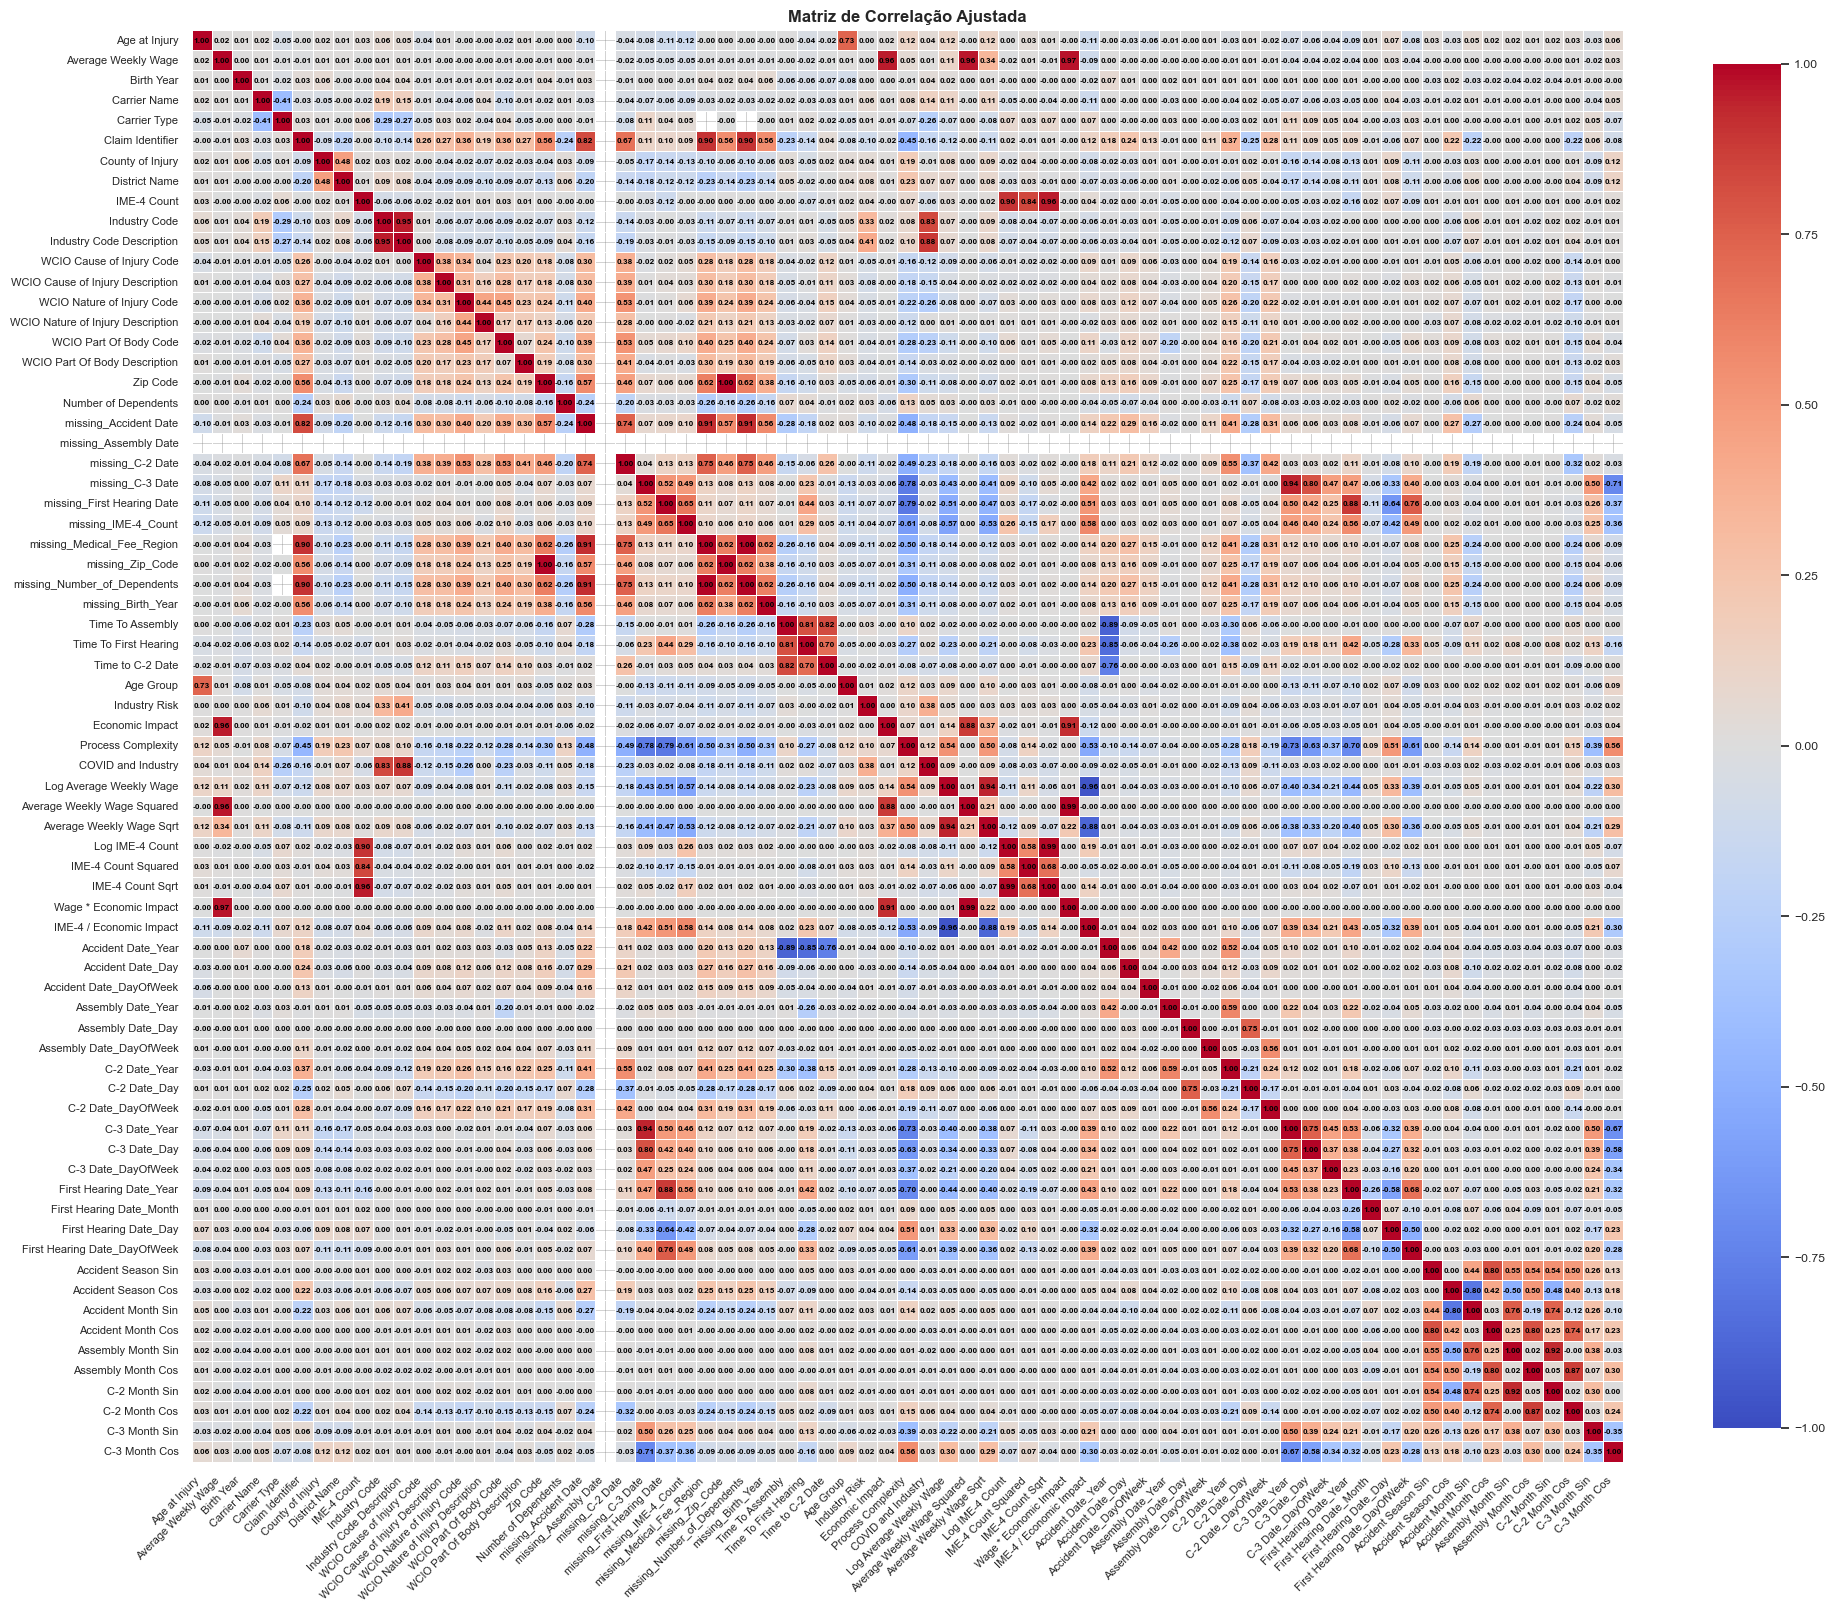

In [161]:
corr_matrix = X_train.select_dtypes(include=['number']).corr()

sns.set(style='whitegrid', font_scale=0.8)

plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            vmin=-1, vmax=1,
            linewidths=0.5,
            square=True,
            cbar_kws={'shrink': 0.8},
            annot_kws={'size': 6, 'weight': 'bold', 'color': 'black'})

# Título e rótulos
plt.title('Matriz de Correlação Ajustada', fontsize=12, weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)

plt.grid(visible=True, linewidth=0.5, color='gray', alpha=0.5)
plt.tight_layout()
plt.show()

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The adjusted correlation matrix provides a detailed view of the relationships between different numerical variables in the dataset. Each cell represents the correlation coefficient between two variables, with values ranging from -1 (perfect negative correlation) to +1 (perfect positive correlation). The color scale helps to quickly identify the strength and direction of these relationships:
</p>

<ul style="line-height: 1.6; font-family: 'Arial', sans-serif;">
    <li><strong>Red Shades (0 to +1):</strong> Indicates positive correlation, where an increase in one variable is generally associated with an increase in the other.</li>
    <li><strong>Blue Shades (0 to -1):</strong> Indicates negative correlation, where an increase in one variable is generally associated with a decrease in the other.</li>
    <li><strong>White/Neutral Colors (around 0):</strong> Indicates weak or no correlation between the variables.</li>
</ul>

<h3 style="color: #4A90E2; text-shadow: 1px 1px #D1D1D1;">Key Observations</h3>

<ul style="line-height: 1.6; font-family: 'Arial', sans-serif;">
    <li><strong>High Positive Correlations:</strong> 
        <ul>
            <li><strong>Average Weekly Wage</strong> and <strong>Time to Assembly</strong> show a strong positive correlation (approximately 0.94), suggesting that higher wages are associated with longer processing times for claims assembly.</li>
            <li><strong>Time to First Hearing</strong> and <strong>Time to C-2 Date</strong> also show a high positive correlation (around 0.94), indicating that delays in the first hearing are often associated with delays in the C-2 report.</li>
            <li><strong>IME-4 Count</strong> and <strong>IME-4 Count Squared</strong> exhibit an almost perfect correlation (0.98), which is expected as squaring the values results in a direct, strong relationship.</li>
        </ul>
    </li>
    <li><strong>High Negative Correlations:</strong>
        <ul>
            <li><strong>Claim Identifier</strong> and <strong>WCIO Nature of Injury Code</strong> show a significant negative correlation (-0.75), which may suggest that specific claim identifiers correspond to particular injury types.</li>
            <li><strong>Process Complexity</strong> and <strong>Economic Impact</strong> show a slightly negative trend, suggesting that cases with higher complexity may be associated with lower economic impact, potentially due to the nature of the claims being less economically impactful despite their complexity.</li>
        </ul>
    </li>
    <li><strong>Weak Correlations:</strong> 
        <ul>
            <li>Many variables exhibit weak correlations (values close to 0), indicating that these pairs of features do not share a strong linear relationship. This could imply that some variables are independent of each other, and they might contribute diverse information to the model without causing issues like multicollinearity.</li>
        </ul>
    </li>
</ul>

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Conclusion:</strong> The correlation matrix reveals several interesting relationships, particularly around claim processing times and economic factors. Strong positive correlations between wage and processing times, as well as between certain injury-related variables, suggest areas of focus for feature selection. Weak correlations between other features indicate the potential for using a variety of independent features in the model, which may enhance its predictive power and generalizability.
</p>


<h2 style="text-align: center; color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 36px; text-shadow: 1px 1px #D1D1D1;">
    Download DataSet
</h2>
<hr style="border: 1px solid #4A90E2;">


In [162]:
X_train.to_csv("../data/X_train_post_PTD.csv", index=False)

In [163]:
y_train.to_csv("../data/y_train_post_PTD.csv", index=False)

In [164]:
X_val.to_csv("../data/X_val_post_PTD.csv", index=False)

In [165]:
y_val.to_csv("../data/y_val_post_PTD.csv", index=False)

In [166]:
data_test.to_csv("../data/data_test_post_PTD.csv", index=False)